In [1]:
import pandas as pd

Mounted at /content/drive


In [2]:
selected_cols = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperScore',
       'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'PercentFunded', 'Investors','LoanStatus']
df = pd.read_csv('prosperLoanData.csv', usecols=selected_cols)
df.dropna(inplace=True)
df["LoanComplete"] = df["LoanStatus"].apply(lambda x: 1 if x in["Completed", "Current", "FinalPaymentInProgress"] else 0)
df.drop(columns=["LoanStatus"], inplace=True)
df.head()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,PercentFunded,Investors,LoanComplete
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,False,"$50,000-74,999",True,6125.000000,0,10000,0.00,0.00,1.0,1,1
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,True,"$25,000-49,999",True,2875.000000,0,10000,5143.20,4091.09,1.0,158,1
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,True,"$100,000+",True,9583.333333,0,15000,2819.85,1563.22,1.0,20,1
5,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10.0,True,"$100,000+",True,8333.333333,0,15000,679.34,351.89,1.0,1,1
6,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,False,"$25,000-49,999",True,2083.333333,0,3000,1226.70,604.25,1.0,1,1


In [3]:
income_mapping = {
    'Not employed': 0,
    '$0': 1,
    '$1-24,999': 2,
    '$25,000-49,999': 3,
    '$50,000-74,999': 4,
    '$75,000-99,999': 5,
    '$100,000+': 6
}
df['IncomeRange'] = df['IncomeRange'].map(income_mapping)
df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].astype(int)
df['IncomeVerifiable'] = df['IncomeVerifiable'].astype(int)

In [4]:
print(df.shape)
df.head()

(84853, 18)


,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,PercentFunded,Investors,LoanComplete
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,0,4,1,6125.000000,0,10000,0.00,0.00,1.0,1,1
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,1,3,1,2875.000000,0,10000,5143.20,4091.09,1.0,158,1
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,1,6,1,9583.333333,0,15000,2819.85,1563.22,1.0,20,1
5,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10.0,1,6,1,8333.333333,0,15000,679.34,351.89,1.0,1,1
6,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,0,3,1,2083.333333,0,3000,1226.70,604.25,1.0,1,1


Will retain only the first 10 components of the data as it contributes the most significantly to the variance.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Split the data into features and target
x_df = df.drop(columns=["LoanComplete"])
y_df = df["LoanComplete"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check explained variance ratio sum
explained_variance_ratio_sum = pca.explained_variance_ratio_.sum()
print(f'Explained Variance Ratio Sum: {explained_variance_ratio_sum}')


Explained Variance Ratio Sum: 0.9511662705975447


### First NN Model

In [16]:
# Define F1 metric
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_metric])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_val_pca, y_val))

# Evaluate on test set
results = model.evaluate(X_test_pca, y_test)
print('Test loss, test accuracy, test F1:', results)

Epoch 1/10
1857/1857 [==============================] - 20s 8ms/step - loss: 0.0811 - accuracy: 0.9786 - f1_metric: 0.9881 - val_loss: 0.0619 - val_accuracy: 0.9837 - val_f1_metric: 0.9908
Epoch 2/10
1857/1857 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9875 - f1_metric: 0.9930 - val_loss: 0.0514 - val_accuracy: 0.9872 - val_f1_metric: 0.9928
Epoch 3/10
1857/1857 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9891 - f1_metric: 0.9939 - val_loss: 0.0464 - val_accuracy: 0.9882 - val_f1_metric: 0.9933
Epoch 4/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9899 - f1_metric: 0.9943 - val_loss: 0.0423 - val_accuracy: 0.9888 - val_f1_metric: 0.9937
Epoch 5/10
1857/1857 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9914 - f1_metric: 0.9952 - val_loss: 0.0439 - val_accuracy: 0.9892 - val_f1_metric: 0.9939
Epoch 6/10
1857/1857 [==============================] - 4s 

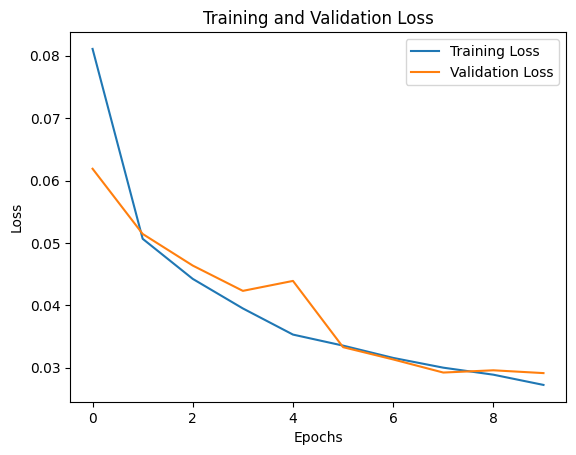

In [17]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Second Model To Reduce Overfitting
* Smaller NN Architecture
* Added DropOuts and Regularization
* Added Early Stopping
* Reduced training batch size

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

# Build the neural network with dropout layers and reduced complexity
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Add dropout layer with 20% dropout rate
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    Dropout(0.2),  # Add another dropout layer
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with reduced batch size and early stopping
# Increased epochs to 14 as Val loss was steadily decreasing
history2 = model2.fit(X_train, y_train, epochs=14, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/14
3713/3713 [==============================] - 21s 5ms/step - loss: 38.0345 - accuracy: 0.8711 - f1_metric: 0.9257 - val_loss: 0.4885 - val_accuracy: 0.8999 - val_f1_metric: 0.9456
Epoch 2/14
3713/3713 [==============================] - 9s 2ms/step - loss: 0.5476 - accuracy: 0.8999 - f1_metric: 0.9456 - val_loss: 0.4596 - val_accuracy: 0.8997 - val_f1_metric: 0.9455
Epoch 3/14
3713/3713 [==============================] - 11s 3ms/step - loss: 0.4458 - accuracy: 0.9002 - f1_metric: 0.9458 - val_loss: 0.3847 - val_accuracy: 0.8997 - val_f1_metric: 0.9455
Epoch 4/14
3713/3713 [==============================] - 11s 3ms/step - loss: 0.3637 - accuracy: 0.9014 - f1_metric: 0.9464 - val_loss: 0.2733 - val_accuracy: 0.9221 - val_f1_metric: 0.9571
Epoch 5/14
3713/3713 [==============================] - 11s 3ms/step - loss: 0.1989 - accuracy: 0.9494 - f1_metric: 0.9718 - val_loss: 0.1126 - val_accuracy: 0.9752 - val_f1_metric: 0.9859
Epoch 6/14
3713/3713 [==============================] -

In [19]:
results = model2.evaluate(X_test, y_test)
print('test loss, test acc, test f1:', results)

398/398 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9928 - f1_metric: 0.9960
test loss, test acc, test f1: [0.03326663747429848, 0.9927718639373779, 0.9959644079208374]


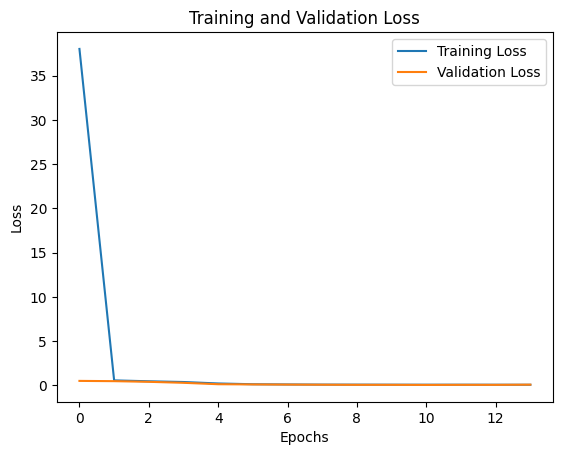

In [20]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Model 3

- Batch Normalization (Ensures stablization of model) (improved LR)
- Added  Learning Rate schedular (Allows easier converging of models)
- Increased size of network
- Lowered Dropout to 0.1
- Both dense layers have an L2 Regularization (Ridge Regression)
- Replaced


In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import regularizers

# Build the neural network with dropout layers and reduced complexity
model3 = Sequential([
    Dense(64, input_shape= (X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(32, kernel_regularizer= regularizers.l2(0.005)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),  # Add dropout layer with 20% dropout rate
    Dense(16,kernel_regularizer = regularizers.l2(0.005)),  # Add L2 regularization
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),  # Add another dropout layer
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Learning rate schedular
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr): # basic LR
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)


# Train the model with reduced batch size and early stopping
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback,early_stopping])

Epoch 1/10
3713/3713 [==============================] - 27s 7ms/step - loss: 0.2601 - accuracy: 0.9441 - f1_metric: 0.9672 - val_loss: 0.1018 - val_accuracy: 0.9794 - val_f1_metric: 0.9882 - lr: 0.0010
Epoch 2/10
3713/3713 [==============================] - 15s 4ms/step - loss: 0.1119 - accuracy: 0.9763 - f1_metric: 0.9864 - val_loss: 0.0950 - val_accuracy: 0.9841 - val_f1_metric: 0.9908 - lr: 0.0010
Epoch 3/10
3713/3713 [==============================] - 15s 4ms/step - loss: 0.0947 - accuracy: 0.9804 - f1_metric: 0.9888 - val_loss: 0.0947 - val_accuracy: 0.9790 - val_f1_metric: 0.9880 - lr: 0.0010
Epoch 4/10
3713/3713 [==============================] - 15s 4ms/step - loss: 0.0853 - accuracy: 0.9822 - f1_metric: 0.9898 - val_loss: 0.0899 - val_accuracy: 0.9811 - val_f1_metric: 0.9892 - lr: 0.0010
Epoch 5/10
3713/3713 [==============================] - 15s 4ms/step - loss: 0.0758 - accuracy: 0.9841 - f1_metric: 0.9909 - val_loss: 0.0792 - val_accuracy: 0.9824 - val_f1_metric: 0.9899 - l

In [22]:
results = model3.evaluate(X_test, y_test)
print('test loss, test acc, test f1:', results)

398/398 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9855 - f1_metric: 0.9919
test loss, test acc, test f1: [0.07382436841726303, 0.9854651093482971, 0.9918645620346069]


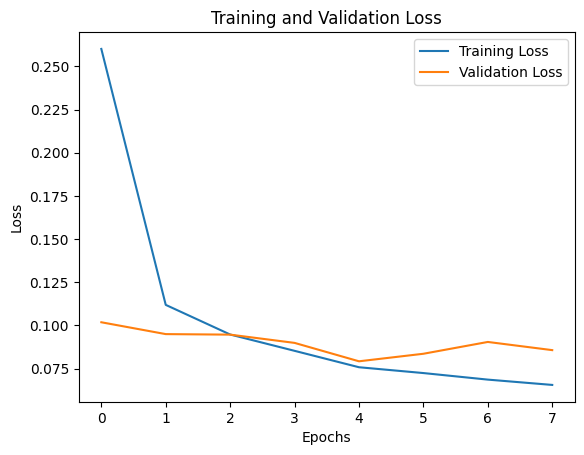

In [23]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()